# Portfolio 1 - Deep learning

    Groepsnummer: 2
    Coach: Vikram 
    Opdrachtnummer: 1
    Namen groepsleden: 
        - Isa Dijkstra, 22119485
        - Natasja , 22059326
        - Vince Ammerlaan, 21049599
    Kaggle naam:
    
    
## ***Inhoudsopgave*** <a name='begin'></a>

1. [Data inladen](#data)
2. [Opdracht 1 -EDA](#eda)
3. [Opdracht 2 - Fully connected neuraal netwerk](#CNN)
4. [Opdracht 3 - Convolutioneel neuraal netwerk from scratch](#CNNs)
5. [Opdracht 4 - Transfer learning](#tl)
6. [Opdracht 5 - Multimodaal model](#mm)
7. [Opdracht 6 - Bevindingen](#bevindingen)
8. [Opdracht 7 - Conclusie en aanbevelingen](#conclusie)
9. [Bronnenlijst](#bronnenlijst)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.image as mpimg
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.utils import plot_model

/Users/vince/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data inladen <a name='data'></a>

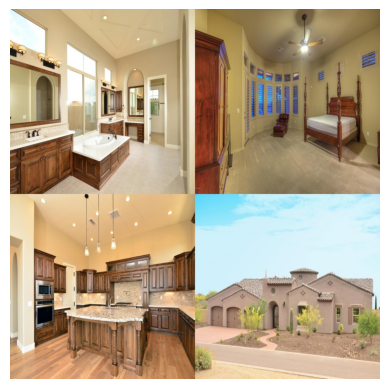

In [2]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = mpimg.imread(image_path)
    return image

#inputPath_vince = "/Users/vince/School - Deep Learning/Train"
#inputPath_isa = 
#inputPath_natasja =

inputPath = 'Train'

#image = load_random_image(inputPath)
image = load_random_image(inputPath)

plt.imshow(image)
plt.axis('off') 
plt.show()

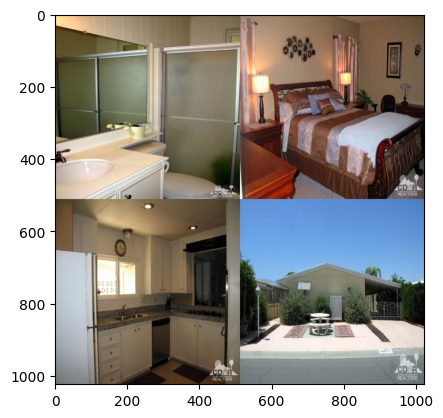

In [3]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = Image.open(image_path)
    return image

image = load_random_image(inputPath)

plt.imshow(image)
plt.show()

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

[Terug naar Inhoudsopgave](#begin)

## Opdracht 1 - EDA <a name='eda'></a>

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


House ID     0
Bedrooms     0
Bathrooms    0
Area         0
Latitude     0
Longitude    0
Price        0
dtype: int64

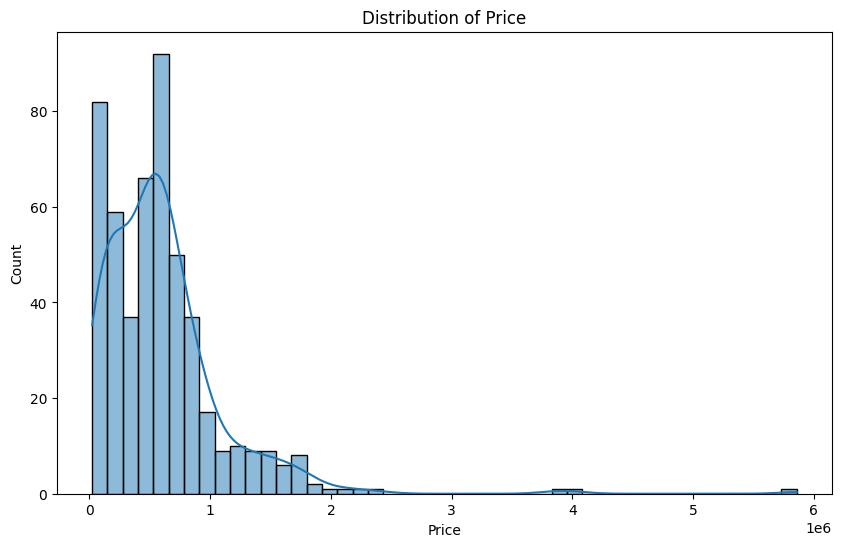

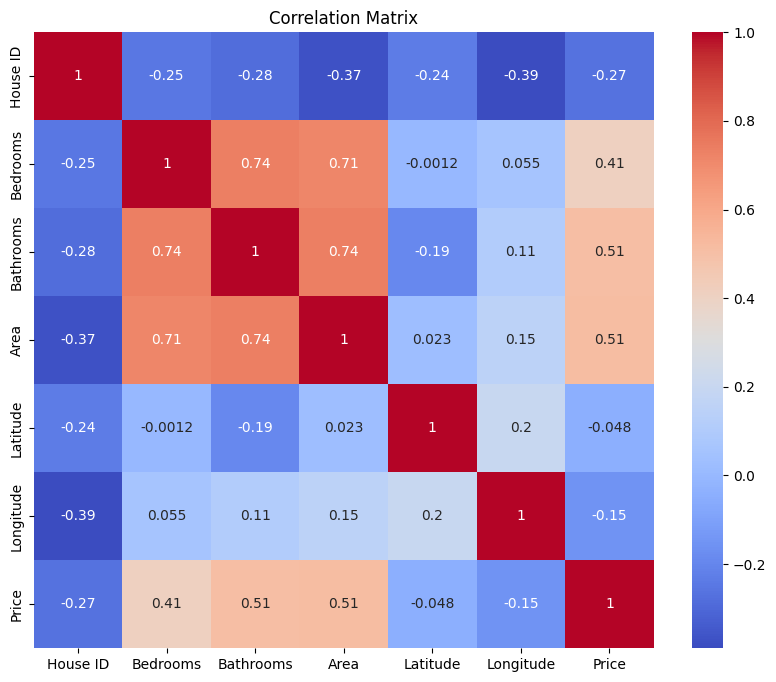

In [5]:
display(train.head())
display(train.describe())

#Missende waardes
display(train.isnull().sum())

# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Correlation matrix
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

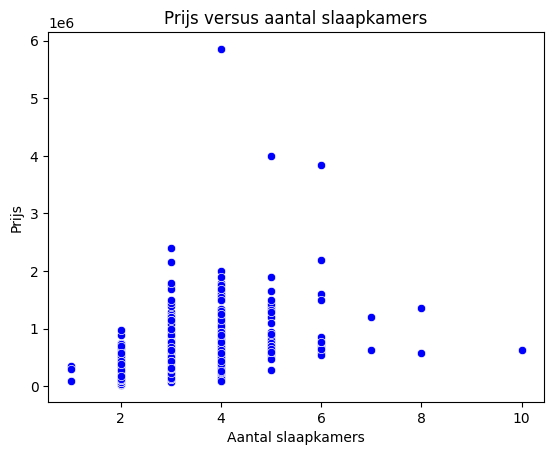

In [6]:
sns.scatterplot(data=train, x='Bedrooms', y='Price', color='blue')
plt.xlabel('Aantal slaapkamers')
plt.ylabel('Prijs')
plt.title('Prijs versus aantal slaapkamers')
plt.show()

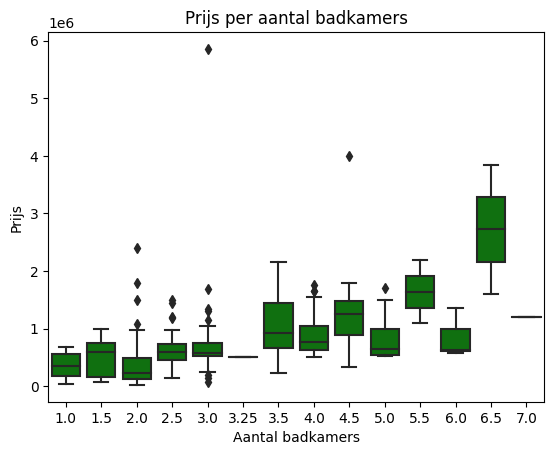

In [7]:
# Boxplot van prijs per aantal badkamers
sns.boxplot(data=train, x='Bathrooms', y='Price', color='green')
plt.xlabel('Aantal badkamers')
plt.ylabel('Prijs')
plt.title('Prijs per aantal badkamers')
plt.show()

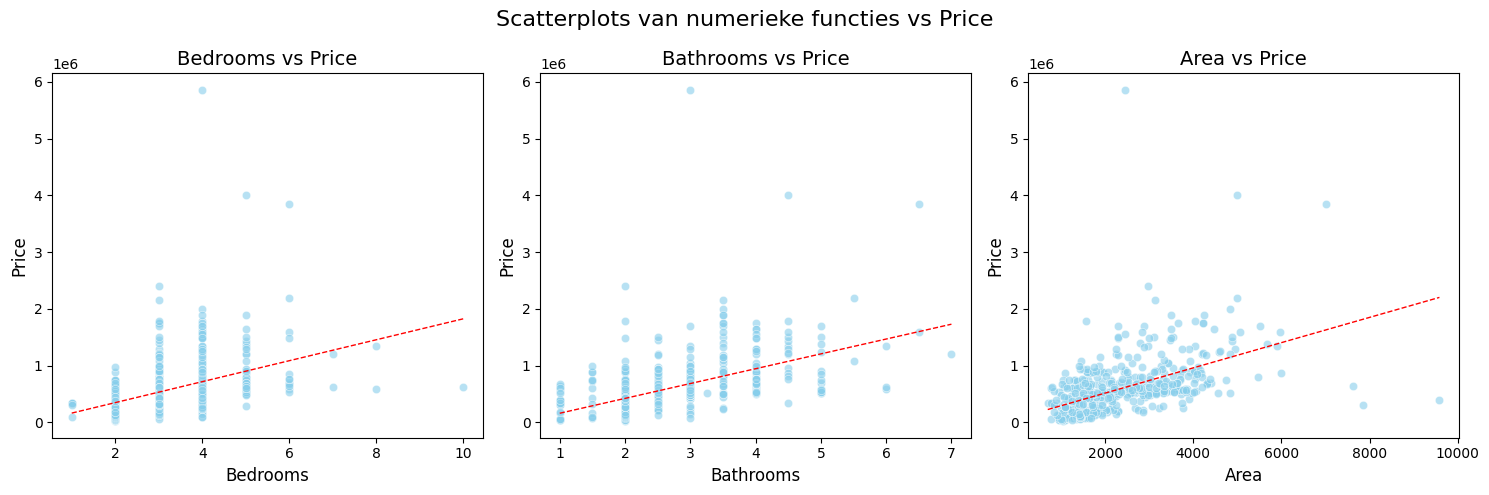

In [8]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).iloc[:, 1:-3]
num_plots = len(numeric_features.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.scatterplot(x=col, y='Price', data=train, color='skyblue', alpha=0.6)
    sns.regplot(x=col, y='Price', data=train, scatter=False, color='red', ci=None, line_kws={'linewidth':1, 'linestyle':'--'})
    plt.title(f"{col} vs Price", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)

plt.suptitle("Scatterplots van numerieke functies vs Price", fontsize=16)
plt.tight_layout()
plt.show()

[Terug naar Inhoudsopgave](#begin)

## Opdracht 2 - Fully connected neuraal netwerk <a name='CNN'></a>

### **Neuraal Netwerk**

In [9]:
train

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226
...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000
496,497,4,2.0,2072,35.6406,-120.7003,429900
497,498,2,2.0,2213,35.6406,-120.7003,585000
498,499,3,2.5,1500,35.6406,-120.7003,319000


In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'price' is the target column
features = train.drop('Price', axis=1)
target = train['Price']

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the number of features in the data
num_features = features.shape[1]

# Create a new sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
model.fit(features_train, target_train, epochs=1000, batch_size=32, validation_data=(features_test, target_test))

Epoch 1/1000
13/13 [==============================] - 0s 5ms/step - loss: 99.9379 - val_loss: 99.8543
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 99.7991 - val_loss: 99.6940
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 99.6480 - val_loss: 99.5128
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 99.4669 - val_loss: 99.2873
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 99.2246 - val_loss: 98.9657
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 98.8887 - val_loss: 98.5400
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 98.4452 - val_loss: 97.9849
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 97.8854 - val_loss: 97.2750
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 97.1631 - val_loss: 96.3907
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 96.2695

### **Modelarchitectuur**

werkt niet

In [11]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### **Keuze's onderbouwen**

### **Welke lossfunctie**

[Terug naar Inhoudsopgave](#begin)

## Opdracht 3 - Convolutioneel neuraal netwerk from scratch <a name='CNNs'></a>

In [13]:
train

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226
...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000
496,497,4,2.0,2072,35.6406,-120.7003,429900
497,498,2,2.0,2213,35.6406,-120.7003,585000
498,499,3,2.5,1500,35.6406,-120.7003,319000


[Terug naar Inhoudsopgave](#begin)

## Opdracht 4 - Transfer learning <a name='tl'></a>

[Terug naar Inhoudsopgave](#begin)

## Opdracht 5 - Multimodaal model <a name='mm'></a>

[Terug naar Inhoudsopgave](#begin)

## Opdracht 6 - Bevindingen <a name='bevindingen'></a>

[Terug naar Inhoudsopgave](#begin)


## Opdracht 7 - Conclusie en aanbevelingen <a name='conclusie'></a>

[Terug naar Inhoudsopgave](#begin)

## Bronnenlijst <a name='bronnenlijst'></a>

[Terug naar Inhoudsopgave](#begin)